# SINMOD example

* varying advection varying diffusion, can consider isotropy or half-angle
* seperable full flexible model

In [1]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
# data = sp.datasets.get_sinmod_training()
# cmin = data['data'].min()
# cmax = data['data'].max()
# for i in range(data['data'].shape[1]):
#     fig, ax = plt.subplots(figsize=(8, 6))
#     im = ax.imshow(data['data'][:,i].reshape(mod.grid.N,mod.grid.M),origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
#     clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
#     ax.set_xlabel('x', fontsize = 15)
#     ax.set_ylabel('y', fontsize = 15)
#     fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
#     fig.savefig("data/data/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
#     fig.set_size_inches(8, 6, forward=True)
#     plt.close()
img = cv2.imread('data/data/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./data/data/data.mp4', fourcc, 10, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,data['data'].shape[1]):
    img = cv2.imread('data/data/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

NameError: name 'data' is not defined

In [2]:
bc = 1
data = sp.datasets.get_sinmod_training()
mod0 = sp.model(grid = sp.grid(x=data['x'], y=data['y'], extend = 5),
    spde = 'var-whittle-matern', ha = False, bc = bc, anisotropic = True)
x0 = np.load("fits/var_advection_var_diffusion_ani_bc1_usable.npy")
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], t = data['t'],extend = 5),
    spde = 'var-advection-var-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)

mod.mod.setQ(x0)
mod.setModel(mu = data['muB'])#, sigmas = np.log(np.load("../fits/sinmod/sigmas.npy")), useCov = True)
# M, N, P = data['x'].size, data['y'].size, data['t'].size
# idx = np.array([0*M*N + j*M + i for i in range(10) for j in range(10)])
# mod.update(y = np.array([-5]*idx.size),idx  = idx)

In [3]:
mvar = mod.qinv(simple = True)
pos = [5,20,0]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)

In [184]:
tmp = mod.sample(n = 20,seed = 69)
cmax = 1
cmin = 0
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(corr.reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/corrt%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/corrt00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoADcorr.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/corrt%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [185]:
mvar =  mvar.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
cmax = mvar.max()
cmin = mvar.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(mvar[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/mvart%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/mvart00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoADmvar.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/mvart%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [186]:
tmp = mod.sample(n = 20,seed = 69)
ver = 5
cmax = tmp[:,ver].max()
cmin = tmp[:,ver].min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(tmp[:,ver].reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoAD.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [187]:
bc = 1
data = sp.datasets.get_sinmod_training()
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], t = data['t'],extend = 5),
    spde = 'seperable-spatial-temporal', ha = False, bc = bc, anisotropic = True)
x0 = np.load("fits/seperable_spatial_temporal_ani_bc1_usable.npy")
mod.mod.setQ(x0)
mod.setModel(mu = data['muB'])

In [188]:
mvar = mod.qinv(simple = True)
pos = [5,20,0]
ik = np.zeros(mod.grid.n)
k = mod.grid.getIdx(pos)
ks = mod.grid.getIdx(pos,extend = False)
ik[k] = 1
cov = mod.grid.getS()@mod.Q_fac.solve_A(ik)
corr = cov/np.sqrt(mvar[ks]*mvar)

In [189]:
tmp = mod.sample(n = 20,seed = 69)
cmax = 1
cmin = 0
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(corr.reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/corrSt%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/corrSt00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoScorr.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/corrSt%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [190]:
tmp = mod.sample(n = 20,seed = 69)
ver = 5
cmax = tmp[:,ver].max()
cmin = tmp[:,ver].min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(tmp[:,ver].reshape(mod.grid.T,mod.grid.N,mod.grid.M)[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("video/St%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()
img = cv2.imread('video/St00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./video/videoS.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('video/St%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

## Visualization of field initial code

In [16]:
# want to make this similar to my 3D plotting in GMRFpy
# using plotly, only now time downwards
import numpy as np
import spdepy as sp
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.subplots import make_subplots
import plotly.io as pio

pio.orca.shutdown_server()
M = mod.grid.M
N = mod.grid.N
T = mod.grid.T
sx = mod.grid.sx
sy = mod.grid.sy
ts = mod.grid.t
value = mvar.reshape(T,-1)
cmin = value.min()
cmax = value.max()
cmin = 0
cmax = 1
value = corr.reshape(T,-1)
cs = "viridis"
xdif = mod.grid.A/4
ydif = mod.grid.B/4
xarrow = np.array([sx.max()-.497*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.142*xdif,sx.max()-.355*xdif])
yarrow = np.array([sy.max()-.520*ydif,sy.max()-.164*ydif,sy.max()-.378*ydif,sy.max()-.164*ydif,sy.max() -.164*ydif])
vZ = np.array([0,0.705,1.67,3])
fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
                                    value=value[9,:],surface_count=1,
                                    isomin = cmin,isomax = cmax,colorscale=cs,
                                    colorbar=dict(thickness=20,lenmode = "fraction", 
                                                  len = 0.8, ticklen=10,
                                                  tickfont=dict(size=25, color='black')))])
for i in range(1,4):
    fig.add_trace(go.Isosurface(z=(-0.5 - vZ[i])*np.ones(N*M), x=sx+xdif*vZ[i], y=sy-ydif*vZ[i],
                                surface_count=1, value=value[9-3*i,:], isomin = cmin,
                                isomax =cmax,colorscale=cs,showscale = False))

if cmin == 0 and cmax == 1:
    fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
                               y = [sy[pos[1]*M + pos[0]]-ydif*3], 
                               z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

for j in range(4):
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*vZ[j],
                               y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))
    fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*vZ[j], 
                               y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*vZ[j], 
                               z=np.array([-0.5,-0.5])-vZ[j], mode='lines',
                               line = dict(color='black'),showlegend=False))

# axis 
fig.add_trace(go.Scatter3d(x=[0,0.213*xdif,0.114*xdif,0.213*xdif,0.114*xdif]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
                            y=[0,0,0.099*ydif,0,-0.099*ydif]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black', width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=[0,0,0.099*xdif,0,-0.099*xdif]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
                            y=[0,0.213*ydif,0.114*ydif,0.213*ydif,0.114*ydif]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
                            line = dict(color='black',width = 5),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
                            y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
                           y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
                           marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
                            y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
                            z=np.array([-0.5])-3, mode='text',textposition="bottom left",
                            text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
                           y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
                           z=np.array([-0.5])-3, mode='text', textposition="bottom right",
                           text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# lines
fig.add_trace(go.Scatter3d(
    x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+xdif*0.099, -0.4*xdif,-0.3*xdif-xdif*0.099])+sx[0],
    y = np.array([-ydif*3,0.4*ydif,0.3*ydif + ydif*0.099, 0.4*ydif, 0.3*ydif-ydif*0.099])+sy[0],
    z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
    line=dict(color='black',width=7),
    mode='lines',
    showlegend=False))

# marker
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='markers',
    marker=dict(size=8, color="black",symbol = "cross"),
    showlegend=False))

# text
fig.add_trace(go.Scatter3d(
    x = np.array([xdif]*4)*np.flip(vZ) + sx[0],
    y = np.array([-ydif]*4)*np.flip(vZ) + sy[0],
    z = np.array([-.5]*4) - np.flip(vZ),
    mode='text',
    text=["%d"%ts[i] for i in range(0,10,3)],
    textfont=dict(size=18,color="black"),
    textposition="middle left",
    showlegend=False))
    
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[0],
    y = np.array([0.5*ydif])+sy[0],
    z = np.array([0.0]),
    mode='text',
    text=["Time (min)"],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
    
# used for centering
fig.add_trace(go.Scatter3d(
    x = np.array([-0.5*xdif])+sx[-1],
    y = np.array([0.5*ydif])+sy[-1],
    z = [0.0],
    mode='text',
    text=[""],
    textfont=dict(size=15,color="black"),
    textposition="middle center",
    showlegend=False))
######

fig.add_trace(go.Scatter3d(
    x=xarrow, 
    y=yarrow,
    z=np.array([0,0,0,0,0])-0.5,
    line=dict(color='white',width=12),
    mode='lines+text',
    text=["","", "N","",""],
    showlegend=False,
    textposition="top center",
    textfont=dict(size=25,color="black")))

camera = dict(eye=dict(x=1.092, y=-1.12, z=.83), center=dict(x=0.13, y=-0.18, z=-0.042))
fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

fig.write_html("test.html", auto_open = True)
fig.write_image("../../../spat_temp_paper/figures/app_vAvD_mcorr.png",engine="orca",scale=1)



## Sample path generation for test metric application

In [780]:
def plot_path(path):
    data = sp.datasets.get_sinmod_training()
    M, N, P = data['x'].size, data['y'].size, data['t'].size
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(data['x'][path[:,0]], data['y'][path[:,1]], 'k', lw = 1)
    if path.shape[0] < 5:
        for i in range(path.shape[0]):
            ax.annotate("%d"%(1+i), (data['x'][path[i,0]], data['y'][path[i,1]]), fontsize = 15)
    ax.pcolormesh(data['x'], data['y'], data['mu'].reshape(N,M), cmap = 'viridis', shading = 'auto')
    return fig, ax

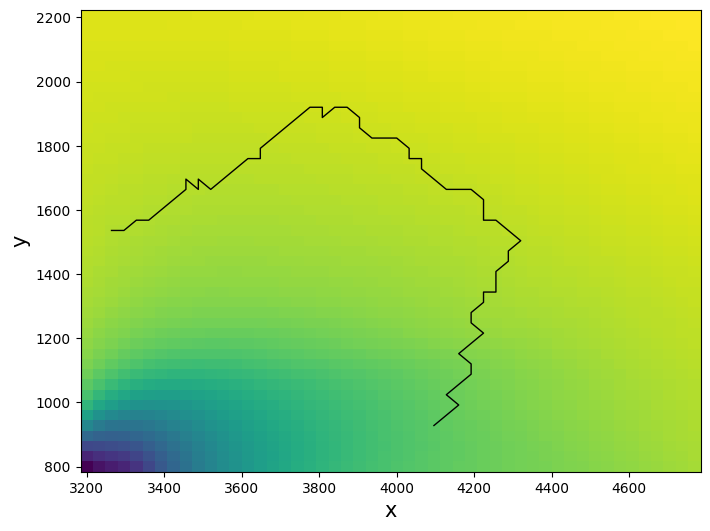

In [791]:
data = sp.datasets.get_sinmod_training()
M = mod.grid.M
N = mod.grid.N
fig, ax = plt.subplots(figsize=(8, 6))
ax.pcolormesh(data['x'], data['y'], data['mu'].reshape(mod.grid.N,mod.grid.M), cmap = 'viridis', shading = 'auto')
idx = np.load("data/paths/%03d.npy"%6)
ts = idx // (M * N)
ys = (idx // M) % N
xs = idx % M
M, N, P = data['x'].size, data['y'].size, data['t'].size
ax.plot(data['x'][xs], data['y'][ys], 'k', lw = 1, alpha = 1)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
fig.savefig("video/path0.png",dpi = 200, bbox_inches = "tight")

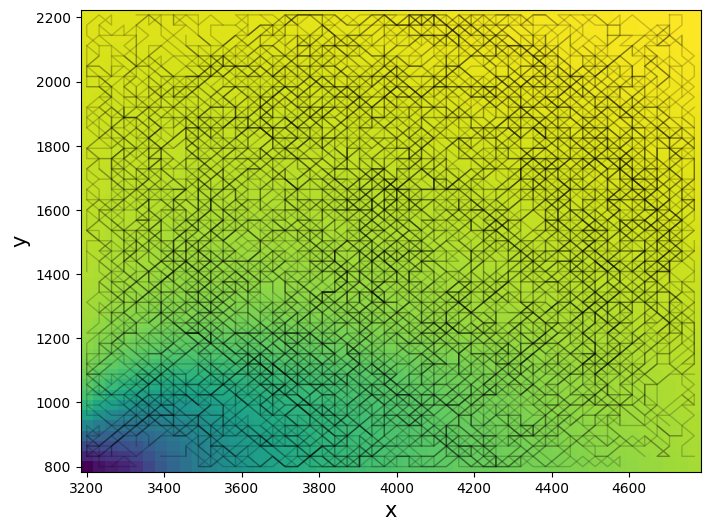

In [782]:
data = sp.datasets.get_sinmod_training()
M = mod.grid.M
N = mod.grid.N
fig, ax = plt.subplots(figsize=(8, 6))
ax.pcolormesh(data['x'], data['y'], data['mu'].reshape(mod.grid.N,mod.grid.M), cmap = 'viridis', shading = 'auto')
for i in range(200):
    idx = np.load("data/paths/%03d.npy"%i)
    ts = idx // (M * N)
    ys = (idx // M) % N
    xs = idx % M
    M, N, P = data['x'].size, data['y'].size, data['t'].size
    ax.plot(data['x'][xs], data['y'][ys], 'k', lw = 1, alpha = 0.2)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
fig.savefig("video/paths.png",dpi = 200, bbox_inches = "tight")

## Make evaluation figures 

In [ ]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt

In [4]:
res_vAvD = np.load("fits/pred_var-advection-var-diffusion-2D-bc1.npy")
res_C = np.load("fits/pred_seperable-spatial-temporal-ani-2D-bc1.npy")
val = sp.datasets.get_sinmod_validation()

In [5]:
mu_vAvD = res_vAvD.mean(axis = (0,2))
sd_vAvD = np.sqrt(res_vAvD.std(axis = (0,2)))
mu_C = res_C.mean(axis = (0,2))
sd_C = np.sqrt(res_C.std(axis = (0,2)))

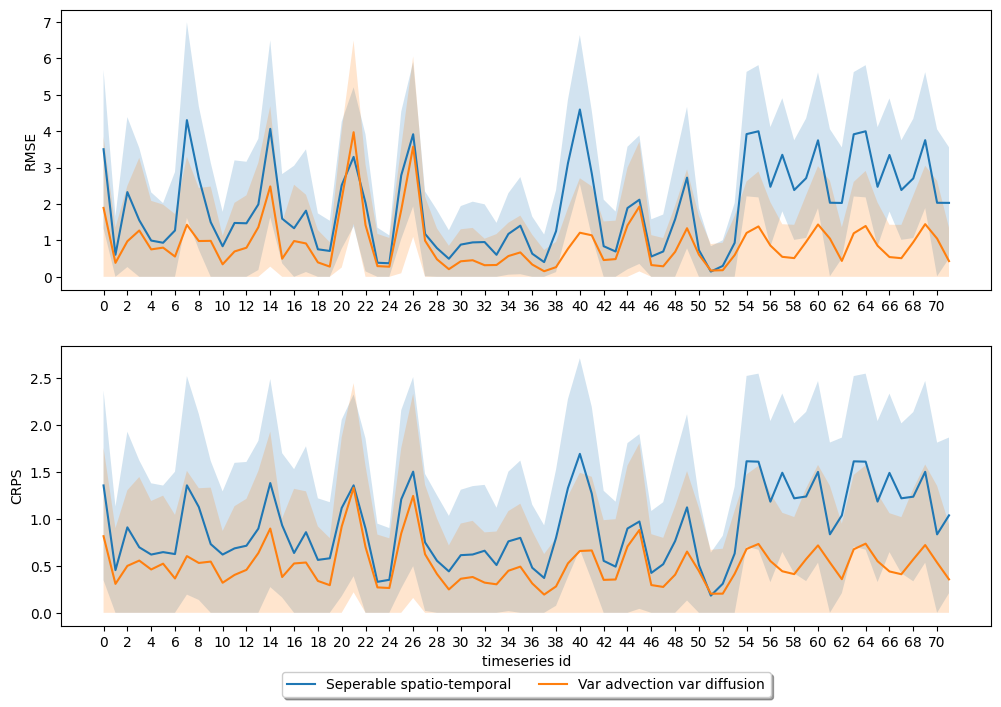

In [11]:
low_vAvD = np.max(np.stack([mu_vAvD - sd_vAvD, np.zeros(mu_vAvD.shape)], axis = 2), axis = 2)
low_C = np.max(np.stack([mu_C - sd_C, np.zeros(mu_C.shape)], axis = 2), axis = 2)
fig, ax = plt.subplots(figsize=(12,8),nrows = 2)
ns = 72 
stm = np.arange(ns).astype("int32")
ax[0].plot(stm,mu_C[:,0][:ns], label = 'Seperable spatio-temporal')
ax[1].plot(stm,mu_C[:,1][:ns], label = 'Seperable spatio-temporal')

ax[0].fill_between(stm, low_C[:,0][:ns], (mu_C[:,0] + sd_C[:,0])[:ns], alpha = 0.2)
ax[1].fill_between(stm, low_C[:,1][:ns], (mu_C[:,1] + sd_C[:,1])[:ns], alpha = 0.2)
ax[0].plot(stm,mu_vAvD[:,0][:ns], label = 'Var advection var diffusion')
ax[1].plot(stm,mu_vAvD[:,1][:ns], label = 'Var advection var diffusion')
ax[0].fill_between(stm, low_vAvD[:,0][:ns], (mu_vAvD[:,0] + sd_vAvD[:,0])[:ns], alpha = 0.2)
ax[1].fill_between(stm, low_vAvD[:,1][:ns], (mu_vAvD[:,1] + sd_vAvD[:,1])[:ns], alpha = 0.2)
ax[0].set_xticks(stm[::2])
ax[1].set_xticks(stm[::2])

ax[1].legend(loc='lower center', bbox_to_anchor=(0.5, -0.28),
          fancybox=True, shadow=True, ncol=2)
ax[1].set_xlabel('timeseries id')
ax[0].set_ylabel('RMSE')
ax[1].set_ylabel('CRPS')

fig.savefig("../../../spat_temp_paper/figures/app_eval.png",bbox_inches='tight',dpi = 200)

---
---

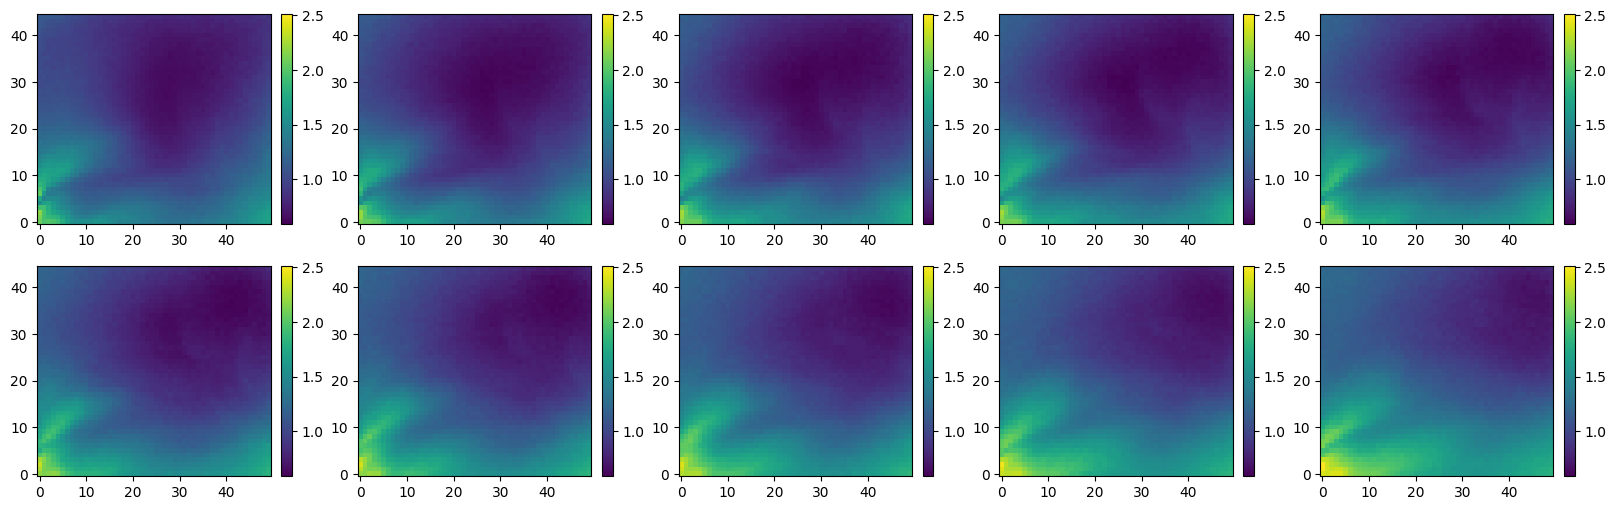

In [113]:
fig, ax = plt.subplots(figsize=(20, 6),ncols = 5,nrows = 2)
vmin = np.sqrt(res1.min())
vmax = np.sqrt(res1.max())
for ts in range(10):
    im = ax[ts//5,ts%5].imshow(np.sqrt(res1.reshape(10,45,50)[ts,:,:]),cmap = "viridis",origin = "lower",vmin = vmin, vmax = vmax)
    fig.colorbar(im, ax=ax[ts//5,ts%5], fraction=0.046, pad=0.04)

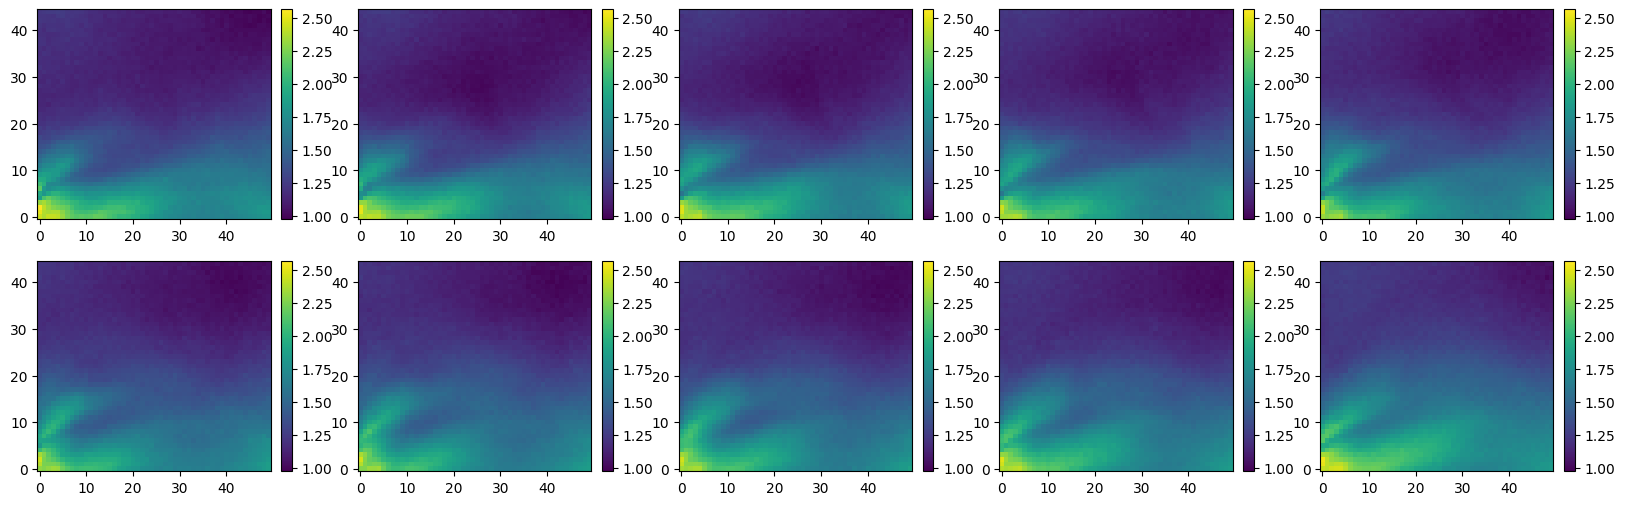

In [114]:
fig, ax = plt.subplots(figsize=(20, 6),ncols = 5,nrows = 2)
vmin = np.sqrt(res2.min())
vmax = np.sqrt(res2.max())
for ts in range(10):
    im = ax[ts//5,ts%5].imshow(np.sqrt(res2.reshape(10,45,50)[ts,:,:]),cmap = "viridis",origin = "lower",vmin = vmin, vmax = vmax)
    fig.colorbar(im, ax=ax[ts//5,ts%5], fraction=0.046, pad=0.04)

In [794]:
res1.mean()

1.2322359425064582

In [795]:
res2.mean()

1.937302780792821

In [796]:
res3.mean()

1.3609280631457925

In [44]:
mod.update(y  = val['data'][idx,0], idx = idx)

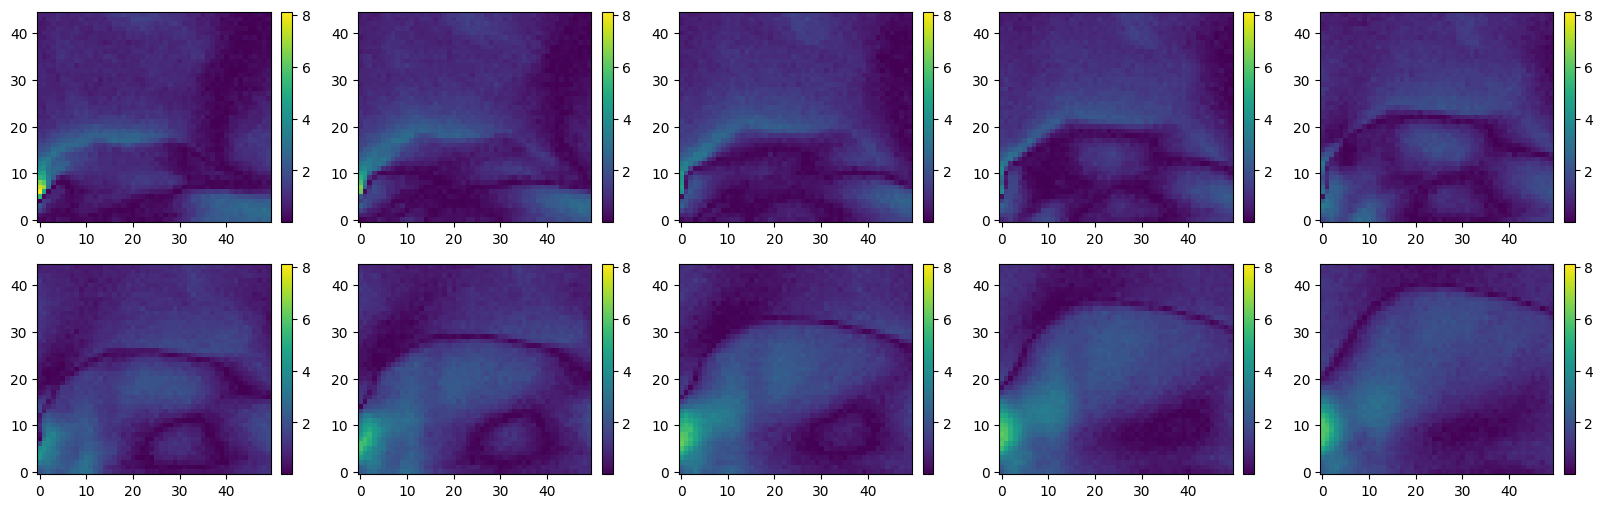

In [50]:
div = 5
fig, ax = plt.subplots(figsize=(20, 6),ncols = 5,nrows = 2)
tmp = ((mod.grid.getS()@mod.mu - val['data'][:,0])**2).reshape(mod.grid.T,mod.grid.N,mod.grid.M)
vmin = np.sqrt(tmp.min())
vmax = np.sqrt(tmp.max())
for ts in range(10):
    im = ax[ts//5,ts%5].imshow(np.sqrt(tmp[ts,:,:]),cmap = "viridis",origin = "lower",vmin = vmin, vmax = vmax)
    fig.colorbar(im, ax=ax[ts//5,ts%5], fraction=0.046, pad=0.04)

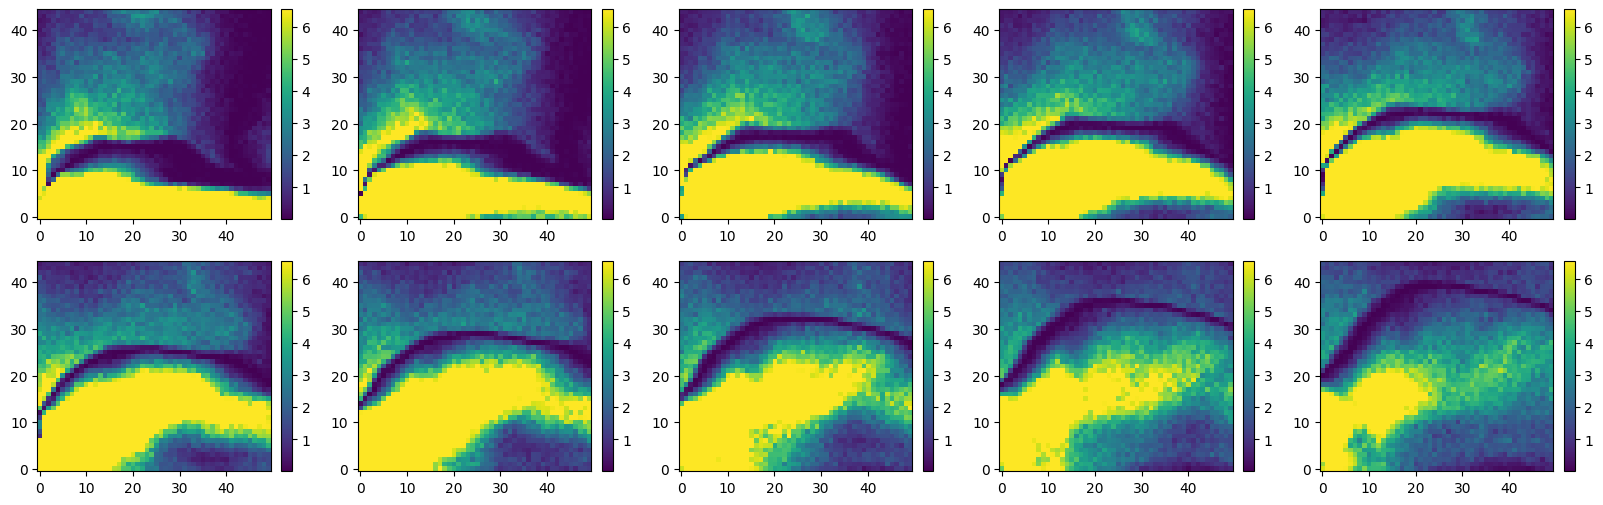

In [51]:
div = 5
fig, ax = plt.subplots(figsize=(20, 6),ncols = 5,nrows = 2)
tmp2 = ((data['muB'] - val['data'][:,0])**2).reshape(mod.grid.T,mod.grid.N,mod.grid.M)
vmin = np.sqrt(tmp2.min())
vmax = np.sqrt(tmp2.max()) 
for ts in range(10):
    im = ax[ts//5,ts%5].imshow((tmp2[ts,:,:]),cmap = "viridis",origin = "lower",vmin = vmin, vmax = vmax)
    fig.colorbar(im, ax=ax[ts//5,ts%5], fraction=0.046, pad=0.04)

In [52]:
1-np.sqrt(tmp.mean())/np.sqrt(tmp2.mean())

0.37835324944051474

# MAKE LUCIA figure

In [475]:
import cv2
import spdepy as sp
import numpy as np
from scipy.spatial.distance import cdist
from tqdm import tqdm

def calc_vario(x,y,val, max_dist = 50.0, by = 1):
    dists = cdist(np.stack([x,y],axis = 1),np.stack([x,y],axis = 1))
    uniq = np.unique(dists[0,:])
    uniq = uniq[uniq < max_dist]
    uniq2 = []
    for i in np.arange(0,max_dist+by,by):
        uniq2.append(uniq[uniq<=i][-1])
    uniq2 = np.hstack(uniq2)
    vario = np.zeros(uniq2.size)
    vario[0] = 0
    for i in tqdm(range(1,uniq2.size)):
        idx = np.where(((dists > uniq2[i-1])*(dists <= uniq2[i])).astype(bool))
        vario[i] = np.mean((val[idx[0]] - val[idx[1]])**2)*0.5
    return uniq2,vario

In [553]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./tmp/stabFEM.mp4', fourcc, 3, (480,480))

for i in range(25):
    img = cv2.imread('tmp/frame%03d.png'%(i+1))
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [763]:
bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,25.0,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 20 
x0 = np.array([-2.5,-1,alpha,alpha,-1,-1,1,np.log(100)])
mod.mod.setQ(x0)
mod.setModel()

In [764]:
np.sqrt(2*alpha**2)*h/(2*np.exp(x0[1]))

38.44231028159117

In [765]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
# tmp3 = []
# for i in range(mod.grid.T):
#     tmp3.append(calc_vario(mod.grid.sx,mod.grid.sy,tmp2[i,:],max_dist = 50.0, by = 1))

In [766]:
cmax = tmp.max()
cmin = tmp.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('y', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("stab/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
    fig.set_size_inches(8, 6, forward=True)
    plt.close()

img = cv2.imread('stab/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./stab/stabFVM.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('stab/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

In [767]:
tmp3 = []
for i in range(mod.grid.T):
    tmp3.append(calc_vario(mod.grid.sx,mod.grid.sy,tmp2[i,:],max_dist = 50.0, by = 1))

100%|██████████| 50/50 [00:22<00:00,  2.27it/s]


In [768]:
mac3 = 0
for i in range(len(tmp3)):
    if tmp3[i][1].max()/2 > mac3:
        mac3 = tmp3[i][1].max()/2

In [769]:
cmax = tmp.max()
cmin = tmp.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize = (15,6),ncols = 2)
    im = ax[0].imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    clb = fig.colorbar(im, ax=ax[0], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].plot(tmp3[i][0],tmp3[i][1]/2,'o')
    ax[1].set_xlabel("Distance (m)", fontsize = 12)
    ax[1].set_ylabel("Variogram", fontsize = 12)
    ax[1].set_ylim(0,mac3)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.95, x = 0.51)
    fig.savefig("stab/t%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()
img = cv2.imread('stab/t00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./stab/stabFVM.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('stab/t%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

## Making visaulization videos/figures

In [5]:
import cv2
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


### Iso

In [689]:

bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 0
x0 = np.array([-2,6,0,0,-1,-1,4,np.log(100)])
mod.mod.setQ(x0)

In [690]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/2)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [691]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [692]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("diff/iso%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('diff/iso00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./diff/iso.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('diff/iso%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Ani

In [693]:

bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)

alpha = 0
x0 = np.array([-1.5,5,30,30,0,0,0,-1,3,np.log(100)])
mod.mod.setQ(x0)

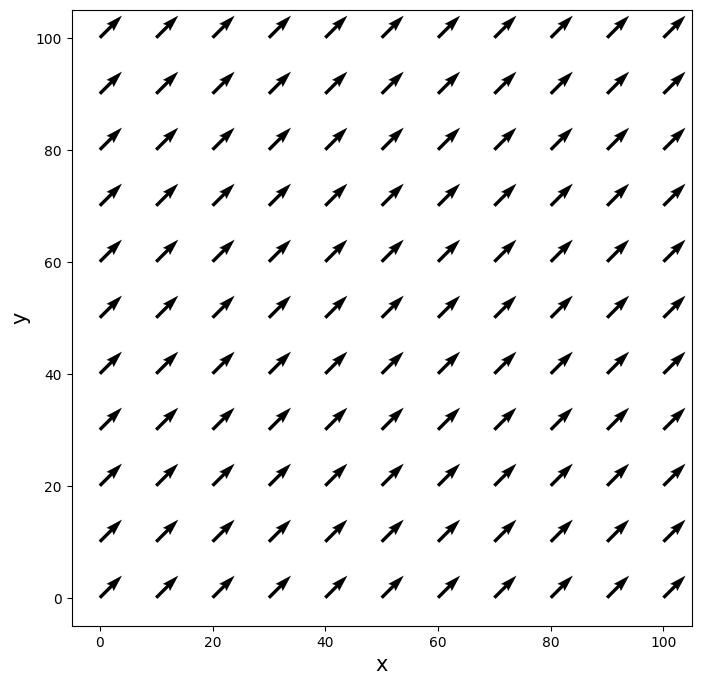

In [694]:
x = np.linspace(0,100,11)
y = np.linspace(0,100,11)
X,Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
vX, vY = 30,30
fig,ax = plt.subplots(figsize = (8,8))
ax.quiver(X,Y,vX,vY)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)
fig.savefig("diff/vani.png",dpi = 200, bbox_inches = "tight")

In [695]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/2)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [696]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [697]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("diff/ani%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('diff/ani00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./diff/ani.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('diff/ani%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Var ani

In [698]:

bc = 3
h = 2.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h)),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25)),
    spde = 'advection-var-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)


In [699]:
from scipy.optimize import minimize
def getVs():
   vx = -2*(mod.grid.sy - 50)
   vy = 2*(mod.grid.sx -50)
   return vx,vy

vx, vy = getVs()   

def findVx(par):
    res = ((mod.grid.evalB(par = par) - vx)**2).mean()
    return res

def findVy(par):
    res = ((mod.grid.evalB(par = par) - vy)**2).mean()
    return res

resx = minimize(findVx, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resy = minimize(findVy, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resy = minimize(findVy, x0 = resy["x"], method = "Nelder-Mead")
     

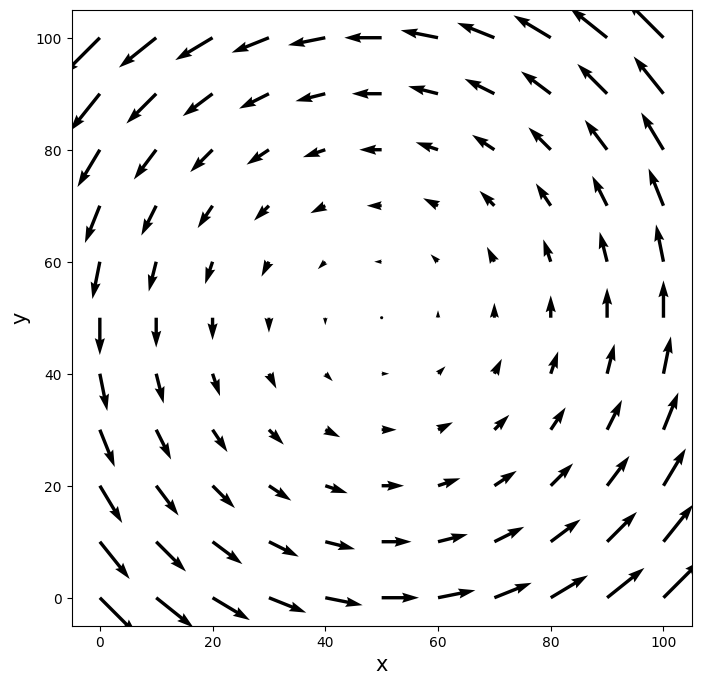

In [700]:
x = np.linspace(0,100,11)
y = np.linspace(0,100,11)
X,Y = np.meshgrid(x,y)
X = X.flatten()
Y = Y.flatten()
vX, vY =-2*(Y - 50), 2*(X -50)
fig,ax = plt.subplots(figsize = (8,8))
ax.quiver(X,Y,vX,vY)
ax.set_xlabel("x", fontsize = 15)
ax.set_ylabel("y", fontsize = 15)
fig.savefig("diff/vvarani.png",dpi = 200, bbox_inches = "tight")

In [702]:
bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-var-diffusion', ha = False, bc = bc, anisotropic = True, mod0 = mod0)

alpha = 1.0
x0 = np.hstack([[-1.5]*9,[4]*9,resx['x']*alpha,resy['x']*alpha,0,0,-1,-1,3,np.log(100)])
mod.mod.setQ(x0)

In [703]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/4)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [704]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [705]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("diff/varani%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('diff/varani00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./diff/varani.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('diff/varani%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Advection

In [706]:

bc = 3
h = 1.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 50
x0 = np.array([-1,5,alpha,alpha,0,-1,3,np.log(100)])
mod.mod.setQ(x0)

In [707]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/2)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [708]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [709]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("adv/const%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('adv/const00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./adv/const.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('adv/const%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

### Var advection

In [716]:

bc = 1
h = 2.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h)),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25)),
    spde = 'var-advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)


In [717]:
from scipy.optimize import minimize
def getVs():
   vx = -2*(mod.grid.sy - 50)
   vy = 2*(mod.grid.sx -50)
   return vx,vy

vx, vy = getVs()   

def findVx(par):
    res = ((mod.grid.evalB(par = par) - vx)**2).mean()
    return res

def findVy(par):
    res = ((mod.grid.evalB(par = par) - vy)**2).mean()
    return res

resx = minimize(findVx, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resx = minimize(findVx, x0 = resx["x"], method = "Nelder-Mead")
resy = minimize(findVy, x0 = np.random.normal(size = 9), method = "Nelder-Mead")
resy = minimize(findVy, x0 = resy["x"], method = "Nelder-Mead")
resy = minimize(findVy, x0 = resy["x"], method = "Nelder-Mead")

In [722]:

bc = 1
h = 2.0
mod0 = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h),extend = 5),
    spde = 'whittle-matern', ha = False, bc = bc, anisotropic = False)

mod = sp.model(grid = sp.grid(x=np.arange(0.0,101.0,h), y=np.arange(0.0,101.0,h), t = np.linspace(0.0,1,25),extend = 5),
    spde = 'var-advection-diffusion', ha = False, bc = bc, anisotropic = False, mod0 = mod0)

alpha = 5
x0 = np.hstack([-1,3,resx['x']*alpha,resy['x']*alpha,0,-1,3,np.log(100)])
mod.mod.setQ(x0)

In [723]:
# make a initial square as mean "mu" for the model
mu = np.zeros(mod.grid.N*mod.grid.M*mod.grid.T)
for j in range(mod.grid.N):
    for i in range(mod.grid.M):
        if np.sqrt((j-mod.grid.N/4)**2 + (i-mod.grid.M/2)**2) < 20/h:
            mu[j*mod.grid.M+i] = 1.0

mod.setModel() 
mod.update(y = mu[mu>0],idx = np.where(mu>0)[0],tau = 1000)

In [724]:
tmp = mod.sample(simple = True).reshape(-1)
tmp2 = tmp.reshape(mod.grid.T,mod.grid.N*mod.grid.M)
tmp = tmp.reshape(mod.grid.T,mod.grid.N,mod.grid.M)
tmp3 = (mod.grid.getS()@mod.mu).reshape(mod.grid.T,mod.grid.N,mod.grid.M)

In [725]:
cmax1 = tmp.max()
cmin1 = tmp.min()
cmax3 = tmp3.max()
cmin3 = tmp3.min()
for i in range(mod.grid.T):
    fig, ax = plt.subplots(figsize=(8, 12),nrows = 2)
    # im = ax.imshow(tmp[i,:,:],origin='lower' ,cmap = "viridis",vmin = cmin, vmax = cmax)
    im1 = ax[0].pcolormesh(mod.grid.x,mod.grid.y,tmp[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin1, vmax = cmax1)
    im2 = ax[1].pcolormesh(mod.grid.x,mod.grid.y,tmp3[i,:,:],cmap = "viridis",shading = "auto",vmin = cmin3, vmax = cmax3)
    fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
    fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
    ax[0].set_xlabel('x', fontsize = 15)
    ax[1].set_xlabel('x', fontsize = 15)
    ax[0].set_ylabel('y', fontsize = 15)
    ax[1].set_ylabel('y', fontsize = 15)
    ax[0].set_title('Conditional realization', fontsize = 15)
    ax[1].set_title('Conditional expectation', fontsize = 15)
    fig.suptitle('t = ' + str(i), fontsize = 15, y = 0.92, x = 0.48)
    fig.savefig("adv/var%02d.png"%i,dpi = 200, bbox_inches = "tight")
    plt.close()

img = cv2.imread('adv/var00.png')
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('./adv/var.mp4', fourcc, 3, (img.shape[1], img.shape[0]))
video.write(img)
for i in range(1,mod.grid.T):
    img = cv2.imread('adv/var%02d.png'%i)
    video.write(img)

cv2.destroyAllWindows()
video.release()

## B-spline viz

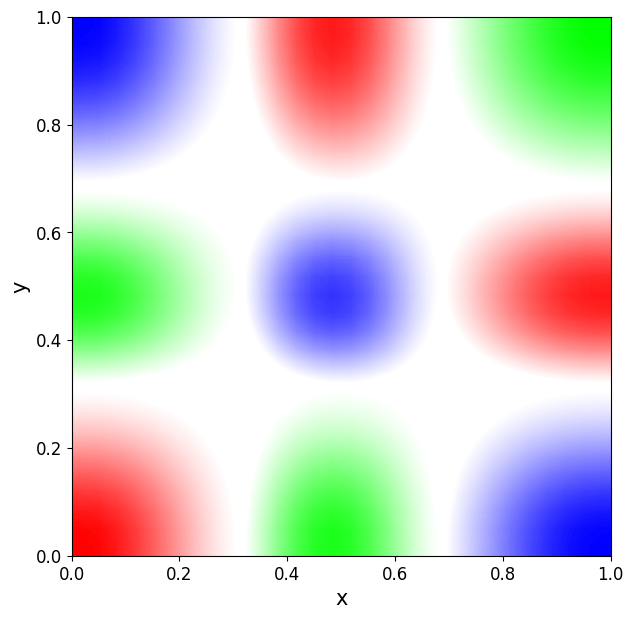

In [9]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
from scipy import sparse
def delete_rows_csr(mat, indices):
    """
    Remove the rows denoted by ``indices`` form the CSR sparse matrix ``mat``.
    """
    if not isinstance(mat, sparse.csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    indices = (indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]



from matplotlib import colors
from matplotlib import cm

mod = sp.model(grid = sp.grid(x= np.linspace(0,1.0,30), y = np.linspace(0,1.0,30)),
    spde = 'whittle-matern', ha = False, bc = 3, anisotropic = False)
mod.grid.bs = (mod.grid.bs/mod.grid.bs.max(axis=0)[np.newaxis,:])
alphas = mod.grid.bs.reshape(mod.grid.M,mod.grid.N,mod.grid.bs.shape[1])

def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

cdictb = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256)))
}

cdictr = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0)))
}

cdictg = {
    'red': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0))),
    'green':  ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(256),inter_from_256(256))),
    'blue': ((0.0,inter_from_256(256),inter_from_256(256)),
           (0.6,inter_from_256(256),inter_from_256(256)),
           (1.0,inter_from_256(0),inter_from_256(0)))
}


cmaps = [colors.LinearSegmentedColormap('red1',segmentdata=cdictr),colors.LinearSegmentedColormap('green1',segmentdata=cdictg),colors.LinearSegmentedColormap('blue1',segmentdata=cdictb),
         colors.LinearSegmentedColormap('green2',segmentdata=cdictg),colors.LinearSegmentedColormap('blue2',segmentdata=cdictb),colors.LinearSegmentedColormap('red2',segmentdata=cdictr),
         colors.LinearSegmentedColormap('blue3',segmentdata=cdictb),colors.LinearSegmentedColormap('red3',segmentdata=cdictr),colors.LinearSegmentedColormap('green3',segmentdata=cdictg)]


fig,ax = plt.subplots(figsize = (7,7))
for i in range(mod.grid.bs.shape[1]):
    ax.imshow(mod.grid.bs[:,i].reshape(mod.grid.M,mod.grid.N), extent=[0, 1, 0, 1], origin='lower',alpha = alphas[:,:,i],interpolation="bilinear",cmap = cmaps[i])
    #ax.contourf(mod.grid.x, mod.grid.y, mod.grid.bs[:,i].reshape(mod.grid.M,mod.grid.N),alpha = [0,0,0,0.3,0.6,0.9,1.0])
ax.set_xlabel("x",fontsize = 15)
ax.set_ylabel("y",fontsize = 15)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
fig.savefig("LuciaFigure",dpi = 60)

In [ ]:
# # want to make this similar to my 3D plotting in GMRFpy
# # using plotly, only now time downwards
# import numpy as np
# import spdepy as sp
# import plotly.graph_objs as go
# from plotly.offline import plot
# from plotly.subplots import make_subplots
# import plotly.io as pio

# pio.orca.shutdown_server()
# M = mod.grid.M
# N = mod.grid.N
# T = mod.grid.T
# sx = mod.grid.sx
# sy = mod.grid.sy
# ts = mod.grid.t
# value = mvar.reshape(T,-1)
# cmin = value.min()
# cmax = value.max()
# cs = "viridis"
# xarrow = np.array([sx.max()-175,sx.max()-50,sx.max()-50,sx.max()-50,sx.max()-125])
# yarrow = np.array([sy.max()-183,sy.max()-58,sy.max()-133,sy.max()-58,sy.max() -58])
# xdif = mod.grid.A/4
# ydif = mod.grid.B/4
# fig = go.Figure(data=[go.Isosurface(z=-0.5*np.ones(N*M), x=sx, y=sy,
#                                     value=value[9,:],surface_count=1,
#                                     isomin = cmin,isomax = cmax,colorscale=cs,
#                                     colorbar=dict(thickness=20,lenmode = "fraction", 
#                                                   len = 0.8, ticklen=10,
#                                                   tickfont=dict(size=25, color='black')))])
# fig.add_trace(go.Isosurface(z=-1.5*np.ones(N*M), x=sx+xdif*1, y=sy-ydif*1,
#                             surface_count=1, value=value[6,:], isomin = cmin,
#                             isomax =cmax,colorscale=cs,showscale = False))
# fig.add_trace(go.Isosurface(z=-2.5*np.ones(N*M), x=sx+xdif*2, y=sy-ydif*2,
#                             surface_count=1, value=value[3,:], isomin = cmin,
#                             isomax =cmax,colorscale=cs,showscale = False))
# fig.add_trace(go.Isosurface(z=-3.5*np.ones(N*M), x=sx+xdif*3, y=sy-ydif*3,
#                             surface_count=1, value=value[0,:], isomin = cmin,
#                             isomax =cmax,colorscale=cs,showscale = False))

# # if pos is not None:
# #     fig.add_trace(go.Scatter3d(mode = "markers", x=[sx[pos[1]*M + pos[0]]+xdif*3],
# #                                y = [sy[pos[1]*M + pos[0]]-ydif*3], 
# #                                z=[-3.5], marker_color="black",marker_size=7,showlegend = False))

# # fig.add_trace(go.Scatter3d(x=[0,0,xdif,xdif*2,xdif*3]+sx[0]-90, 
# #                            y=[0,0,-ydif,-ydif*2,-ydif*3]+sy[0]-90, 
# #                            z=[0,-0.5,-1.5,-2.5,-3.5], mode='text',
# #                            text = ["Time:",str(int(ts[9])),str(int(ts[6])),str(int(ts[3])),str(int(ts[0]))],
# #                            textfont=dict(size=25,color="black"),showlegend=False))
# for j in range(4):
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, 0*M + (M-1)]]+xdif*j, 
#                                y=[0,0]+sy[[0*M + 0, 0*M + (M-1)]]-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + 0, (N-1)*M + 0]]+xdif*j,
#                                y=[0,0]+sy[[0*M + 0, (N-1)*M + 0]]-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[(N-1)*M + 0, (N-1)*M + (M-1)]]+xdif*j, 
#                                y=[0,0]+sy[[(N-1)*M + 0, (N-1)*M + (M-1)]]-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))
#     fig.add_trace(go.Scatter3d(x=[0,0]+sx[[0*M + (M-1), (N-1)*M + (M-1)]]+xdif*j, 
#                                y=[0,0]+sy[[0*M + (M-1), (N-1)*M + (M-1)]]+-ydif*j, 
#                                z=np.array([-0.5,-0.5])-j, mode='lines',
#                                line = dict(color='black'),showlegend=False))

# # axis 
# fig.add_trace(go.Scatter3d(x=[0,75,40,75,40]+sx[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]+xdif*3, 
#                             y=[0,0,35,0,-35]+sy[[0*M + 0, 0*M + (M-1), 0*M + (M-1), 0*M + (M-1), 0*M + (M-1)]]-ydif*3, 
#                             z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
#                             line = dict(color='black', width = 5),showlegend=False))
# fig.add_trace(go.Scatter3d(x=[0,0,35,0,-35]+sx[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+xdif*3, 
#                             y=[0,75,40,75,40]+sy[[0*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3, 
#                             z=np.array([-0.5,-0.5,-0.5,-0.5,-0.5])-3, mode='lines',
#                             line = dict(color='black',width = 5),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]+xdif*3, 
#                             y=sy[[0*M + 1*(M-1)//4, 0*M + 2*(M-1)//4,0*M + 3*(M-1)//4, 0*M + (M-1)]]-ydif*3, 
#                             z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
#                             marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+xdif*3,
#                            y=sy[[1*(N-1)//4*M + (M-1), 2*(N-1)//4*M + (M-1), 3*(N-1)//4*M + (M-1), (N-1)*M + (M-1)]]+-ydif*3,
#                            z=np.array([-0.5,-0.5,-0.5,-0.5])-3, mode='markers',
#                            marker = dict(color='black', size = 2,symbol = "x"),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[0*M + 2*(M-1)//4]]+xdif*3, 
#                             y=sy[[0*M + 2*(M-1)//4]]-ydif*3, 
#                             z=np.array([-0.5])-3, mode='text',textposition="bottom left",
#                             text = ["x"],textfont=dict(size=18,color="black"),showlegend=False))
# fig.add_trace(go.Scatter3d(x=sx[[2*(N-1)//4*M + (M-1)]]+xdif*3,
#                            y=sy[[2*(N-1)//4*M + (M-1)]]+-ydif*3,
#                            z=np.array([-0.5])-3, mode='text', textposition="bottom right",
#                            text = ["y"],textfont=dict(size=18,color="black"),showlegend=False))
# # lines
# fig.add_trace(go.Scatter3d(
#     x = np.array([xdif*3,-0.4*xdif,-0.3*xdif+35,-0.4*xdif,-0.3*xdif-35])+sx[0],
#     y = np.array([-ydif*3,0.4*ydif,0.3*ydif+35,0.4*ydif,0.3*ydif-35])+sy[0],
#     z = np.array([-3.5,-0.1,-0.2,-0.1,-0.2]),
#     line=dict(color='black',width=7),
#     mode='lines',
#     showlegend=False))

# # marker
# fig.add_trace(go.Scatter3d(
#     x = np.array([xdif*3,xdif*2,xdif*1,0])+sx[0],
#     y = np.array([-ydif*3,-ydif*2,-ydif,0])+sy[0],
#     z = np.array([-3.5,-2.5,-1.5,-0.5]),
#     mode='markers',
#     marker=dict(size=8, color="black",symbol = "cross"),
#     showlegend=False))

# # text
# fig.add_trace(go.Scatter3d(
#     x = np.array([xdif*3,xdif*2,xdif*1,0])+sx[0],
#     y = np.array([-ydif*3,-ydif*2,-ydif,0])+sy[0],
#     z = np.array([-3.5,-2.5,-1.5,-0.5]),
#     mode='text',
#     text=[str(int(ts[0])),str(int(ts[3])),str(int(ts[6])),str(int(ts[9]))],
#     textfont=dict(size=18,color="black"),
#     textposition="middle left",
#     showlegend=False))
    
# fig.add_trace(go.Scatter3d(
#     x = np.array([-0.5*xdif])+sx[0],
#     y = np.array([0.5*ydif])+sy[0],
#     z = np.array([0.0]),
#     mode='text',
#     text=["Time (min)"],
#     textfont=dict(size=15,color="black"),
#     textposition="middle center",
#     showlegend=False))
    
# # used for centering
# fig.add_trace(go.Scatter3d(
#     x = np.array([-0.5*xdif])+sx[-1],
#     y = np.array([0.5*ydif])+sy[-1],
#     z = [0.0],
#     mode='text',
#     text=[""],
#     textfont=dict(size=15,color="black"),
#     textposition="middle center",
#     showlegend=False))
# ######

# fig.add_trace(go.Scatter3d(
#     x=xarrow, 
#     y=yarrow,
#     z=np.array([0,0,0,0,0])-0.5,
#     line=dict(color='white',width=12),
#     mode='lines+text',
#     text=["","", "N","",""],
#     showlegend=False,
#     textposition="top center",
#     textfont=dict(size=25,color="black")))

# camera = dict(eye=dict(x=.97, y=-.97, z=1.2), center=dict(x=0.15, y=-0.18, z=0.05))
# fig.update_scenes(xaxis_visible=False, yaxis_visible=False, zaxis_visible=False, camera = camera)
# fig.update_layout(autosize=False, width=650, height=1000, scene_aspectratio=dict(x=1, y=1, z=1.0))

# fig.write_html("test.html", auto_open = True)
# # fig.write_image("../../../spat_temp_paper/figures/app_vAvD_mvar.png",engine="orca",scale=1)

